In [1]:
import matplotlib.pyplot as plt
import json
from tools.utilities  import json2dict_cpp, plot_graph, divide_by_threads, compute_nevents, json2dict_cpp_updated

In [12]:
data_cpp = json2dict_cpp("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_cpp_without_cache.json", [1, 65, 1])
data_cpp_updated = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/jsonfiles/perf_wcr_updated.json", [1, 65, 1])
n_threads = [i for i in range(1, 65, 1)]

In [13]:
data_cpp_updated.keys()

dict_keys(['time', 'elapsed', 'cputime', 'real_time', 'user_time', 'sys_time'])

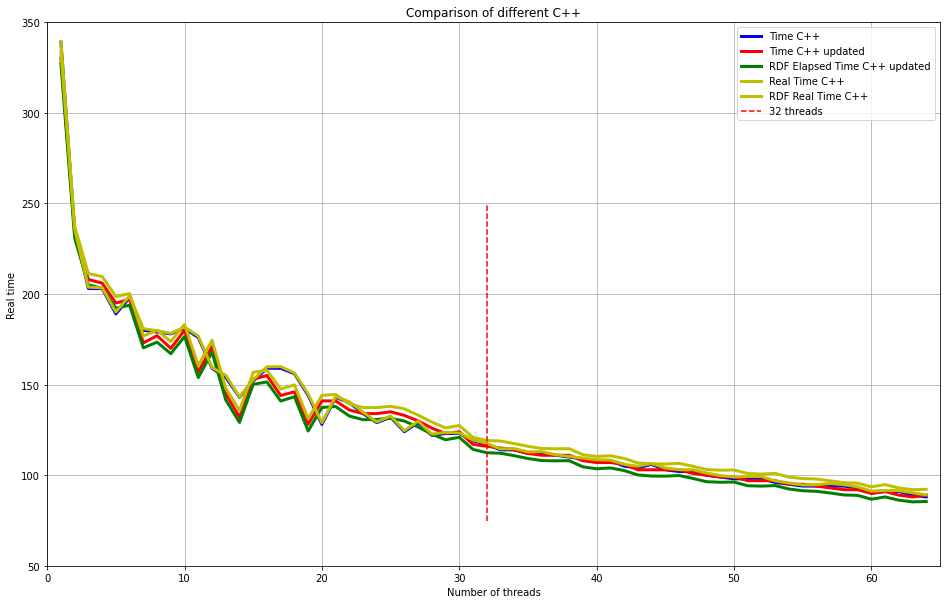

In [22]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)
plt.plot(n_threads, data_cpp["bench_time"], color='b', label='Time C++', linewidth=3)
plt.plot(n_threads, data_cpp_updated["time"], color='r', label='Time C++ updated', linewidth=3)
plt.plot(n_threads, data_cpp_updated["elapsed"], color='g', label='RDF Elapsed Time C++ updated', linewidth=3)
plt.plot(n_threads, data_cpp["real_time"], color='y', label='Real Time C++', linewidth=3)
plt.plot(n_threads, data_cpp_updated["real_time"], color='y', label='RDF Real Time C++', linewidth=3)
# plt.plot(n_threads, real_time_c_wo_cache, color='g', label='Real time (C++)', linewidth=3)
# plt.plot(n_threads, real_time_py_wo_cache, color='y', label='Real time (Py stdalone) cache realise', linewidth=3)
plt.vlines(x = 32, ymin = 75, ymax = 250, color = 'r', label = '32 threads', linestyles="dashed")
plt.xlabel("Number of threads")
plt.ylabel("Real time")
plt.title("Comparison of different C++")
plt.legend()
plt.xlim((0, 65))
plt.ylim((50, 350))
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(16, 10), facecolor='white')
ax = plt.axes()
ax.set_facecolor('white')
ax.set_alpha(0.1)
plt.plot(n_threads, data_cpp["bench_time"], color='b', label='Time C++', linewidth=3)
plt.plot(n_threads, data_cpp_updated["time"], color='r', label='Time C++ updated', linewidth=3)
# plt.plot(n_threads, real_time_c_wo_cache, color='g', label='Real time (C++)', linewidth=3)
# plt.plot(n_threads, real_time_py_wo_cache, color='y', label='Real time (Py stdalone) cache realise', linewidth=3)
plt.vlines(x = 32, ymin = 75, ymax = 250, color = 'r', label = '32 threads', linestyles="dashed")
plt.xlabel("Number of threads")
plt.ylabel("Real time")
plt.title("Comparison of C++ and Python versions")
plt.legend()
plt.xlim((0, 65))
plt.ylim((0, 400))
plt.grid()
plt.show()

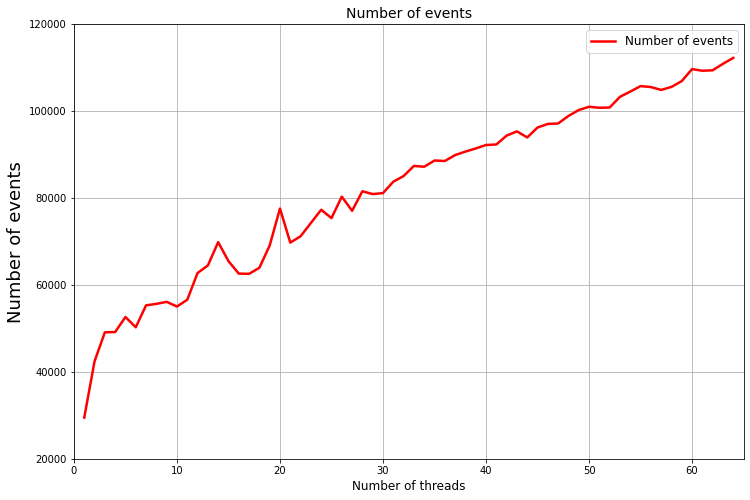

<Figure size 432x288 with 0 Axes>

In [12]:
nevents = compute_nevents(10000000, data_cpp["real_time"])
plot_graph(nevents, [20_000, 120_000], [1, 65, 1], "perf_cpp", "Number of events")

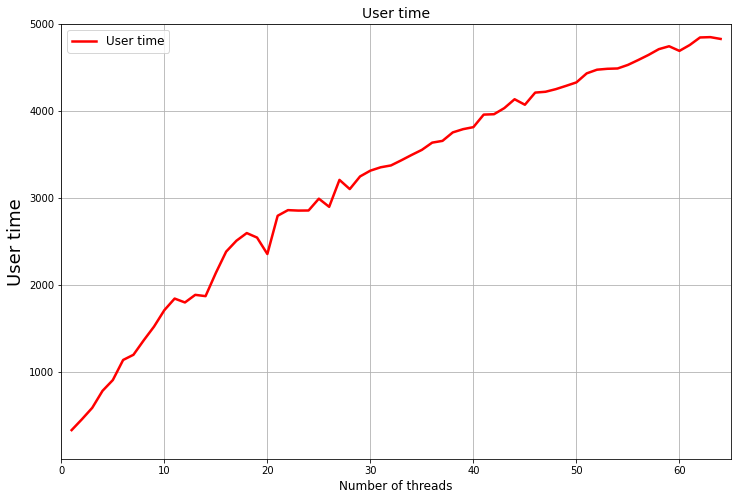

<Figure size 432x288 with 0 Axes>

In [11]:
plot_graph(data_cpp["user_time"], [5, 5000], [1, 65, 1], "perf_cpp", "User time")

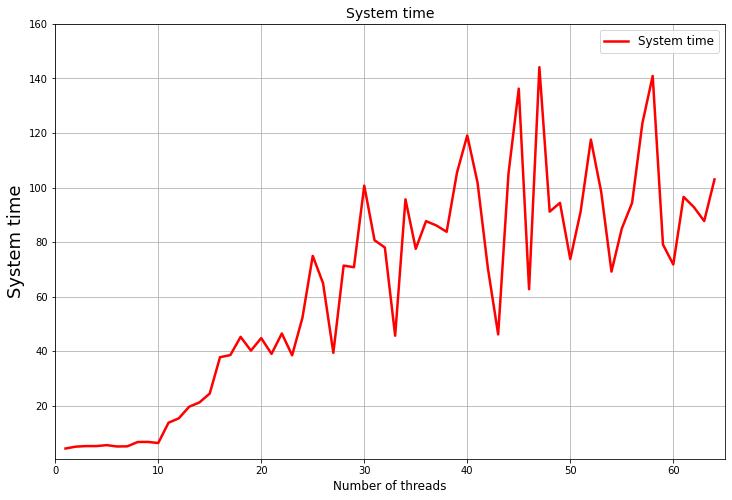

<Figure size 432x288 with 0 Axes>

In [18]:
plot_graph(data_cpp["sys_time"], [0.5, 160], [1, 65, 1], "perf_cpp", "System time")